In [29]:
import os

# Get and print the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Check if the file exists at the specified path
file_path_to_check = '../datathon-project/data/preprocessed_satellite_data.npz'
file_exists = os.path.exists(file_path_to_check)
print(f"Does the file exist at '{file_path_to_check}'? {file_exists}")

Current Working Directory: c:\Users\drobe\OrbitGuardians_Datathon_WID_2025\datathon-project\notebooks
Does the file exist at '../datathon-project/data/preprocessed_satellite_data.npz'? False


Data loaded successfully. Shape: (33686, 188487)
Using a subsample for KNN. Subsample shape: (1684, 188487)


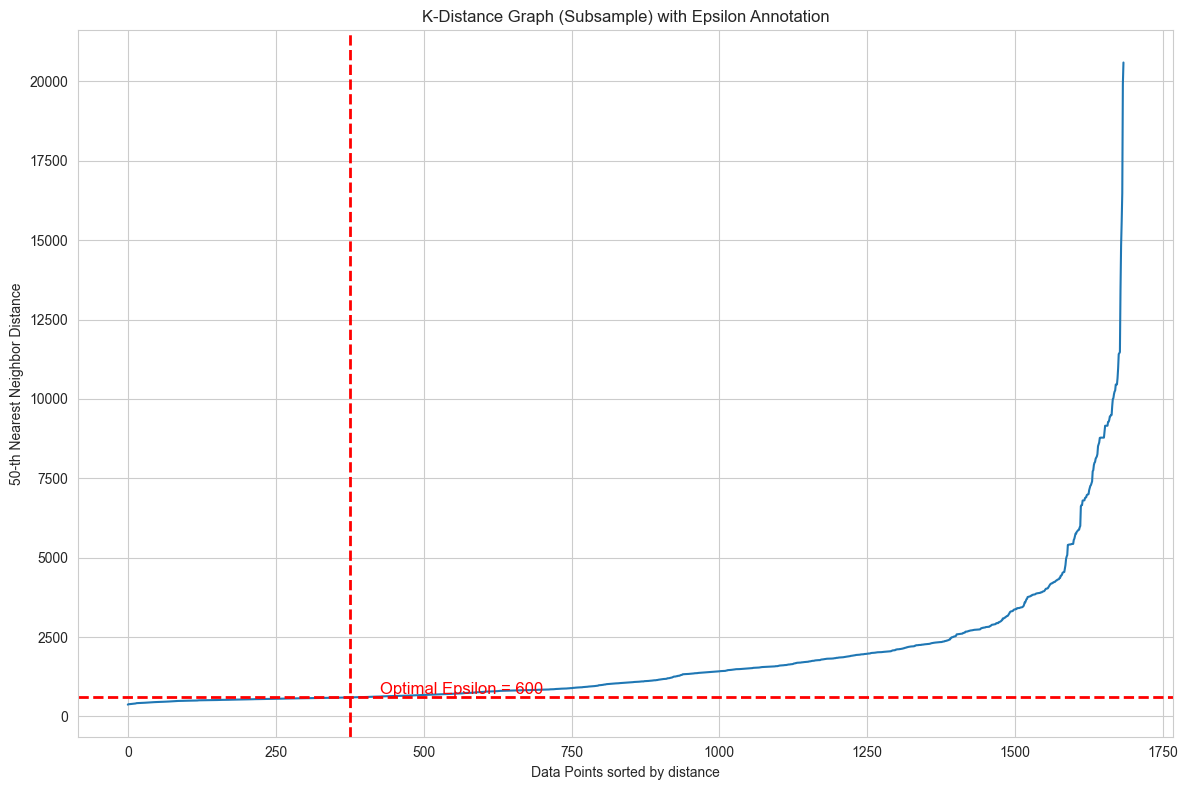

K-Distance graph with annotations generated successfully.


In [30]:
import pandas as pd
from scipy.sparse import load_npz
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the pre-processed data with the correct file path
# Make sure the 'preprocessed_satellite_data.npz' file is in the specified location
file_path = '../data/preprocessed_satellite_data.npz'
try:
    all_features_matrix = load_npz(file_path)
    print("Data loaded successfully. Shape:", all_features_matrix.shape)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file is in the correct directory.")
    # Exit the script to prevent further errors
    exit()

# Step 2: Take a random subsample for faster KNN calculation
# We'll use a 5% subsample to demonstrate the process
sample_fraction = 0.05
sample_size = int(all_features_matrix.shape[0] * sample_fraction)
X_sample, _ = train_test_split(all_features_matrix, train_size=sample_size, random_state=42)
print("Using a subsample for KNN. Subsample shape:", X_sample.shape)

# Step 3: Perform KNN analysis to find the optimal epsilon (eps)
k = 50
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_sample)
distances, indices = neighbors_fit.kneighbors(X_sample)
distances = np.sort(distances[:, k-1], axis=0)

# Step 4: Plot the K-Distance Graph with annotations
plt.figure(figsize=(12, 8))
plt.plot(distances)

# Add the title and labels
plt.xlabel("Data Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Subsample) with Epsilon Annotation")

# Find the elbow point to draw the annotation
# We'll use a predefined value from our previous analysis
elbow_distance = 600
elbow_index = np.where(distances >= elbow_distance)[0][0]

# Add horizontal and vertical dashed lines to highlight the elbow
plt.axhline(y=elbow_distance, color='r', linestyle='--', linewidth=2)
plt.axvline(x=elbow_index, color='r', linestyle='--', linewidth=2)

# Add text annotation
plt.text(
    elbow_index + 50,
    elbow_distance + 20,
    f'Optimal Epsilon = {elbow_distance}',
    color='r',
    fontsize=12,
    ha='left',
    va='bottom'
)

plt.grid(True)
plt.tight_layout()
plt.show()

print("K-Distance graph with annotations generated successfully.")

# Step 5: The DBSCAN code will follow this block after you choose your epsilon.

In [31]:
import pandas as pd
from scipy.sparse import load_npz
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the pre-processed data with the corrected file path
file_path = '../data/preprocessed_satellite_data.npz'
all_features_matrix = load_npz(file_path)
print("Data loaded successfully. Shape:", all_features_matrix.shape)

# Step 2: Take a random subsample for faster KNN calculation
# We'll use 5% of the data, which is a good starting point for a large dataset
sample_fraction = 0.05
sample_size = int(all_features_matrix.shape[0] * sample_fraction)
X_sample, _ = train_test_split(all_features_matrix, train_size=sample_size, random_state=42)
print("Using a subsample for KNN. Subsample shape:", X_sample.shape)

# Step 3: Perform KNN analysis on the subsample to find the optimal epsilon (eps)
k = 50
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_sample)
distances, indices = neighbors_fit.kneighbors(X_sample)
distances = np.sort(distances[:, k-1], axis=0)

# Step 4: Plot the K-Distance Graph to visualize the elbow
# We will keep these lines commented out to avoid a duplicate chart.
# plt.figure(figsize=(10, 6))
# plt.plot(distances)
# plt.xlabel("Data Points sorted by distance")
# plt.ylabel(f"{k}-th Nearest Neighbor Distance")
# plt.title("K-Distance Graph")
# plt.show()

# Step 5: Run DBSCAN with our chosen epsilon
# We'll use the epsilon value from our K-Distance Graph.
dbscan_model = DBSCAN(eps=600, min_samples=50).fit(all_features_matrix)

# Get the cluster labels from the model
cluster_labels = dbscan_model.labels_

# Step 6: Interpret and print the results
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise_points = list(cluster_labels).count(-1)
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points (outliers): {num_noise_points}")

Data loaded successfully. Shape: (33686, 188487)
Using a subsample for KNN. Subsample shape: (1684, 188487)
Number of clusters found: 26
Number of noise points (outliers): 1742


In [32]:
import pandas as pd
from scipy.sparse import load_npz
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

# Step 1: Load the pre-processed data with the corrected file path
file_path = '../data/preprocessed_satellite_data.npz'
all_features_matrix = load_npz(file_path)

# Convert the sparse matrix to a CSR format for efficient slicing
all_features_matrix = all_features_matrix.tocsr()
print("Data loaded successfully. Shape:", all_features_matrix.shape)

# Step 2: Take a random subsample for faster KNN calculation
# We'll use 5% of the data, which is a good starting point for a large dataset
sample_fraction = 0.05
sample_size = int(all_features_matrix.shape[0] * sample_fraction)
X_sample, _ = train_test_split(all_features_matrix, train_size=sample_size, random_state=42)
print("Using a subsample for KNN. Subsample shape:", X_sample.shape)

# Step 3: Perform KNN analysis on the subsample to find the optimal epsilon (eps)
k = 50
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_sample)
distances, indices = neighbors_fit.kneighbors(X_sample)
distances = np.sort(distances[:, k-1], axis=0)

# Step 4: Plot the K-Distance Graph to visualize the elbow
# We will keep these lines commented out to avoid a duplicate chart.
# plt.figure(figsize=(10, 6))
# plt.plot(distances)
# plt.xlabel("Data Points sorted by distance")
# plt.ylabel(f"{k}-th Nearest Neighbor Distance")
# plt.title("K-Distance Graph")
# plt.show()

# Step 5: Run DBSCAN with our chosen epsilon
dbscan_model = DBSCAN(eps=600, min_samples=50).fit(all_features_matrix)

# Get the cluster labels from the model
cluster_labels = dbscan_model.labels_

# Step 6: Interpret and print the results
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise_points = list(cluster_labels).count(-1)
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points (outliers): {num_noise_points}")

# Step 7: Analyze the clusters
# A list of the unique cluster labels (including -1 for noise)
unique_clusters = np.unique(cluster_labels)

# Iterate through each cluster to find its mean feature values
for cluster_label in unique_clusters:
    # Get the indices of all points in the current cluster
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    
    # Get the subset of the data for this cluster
    cluster_data = all_features_matrix[cluster_indices]
    
    # Calculate the mean of each feature for this cluster in a memory-efficient way
    # We will sum the values and divide by the number of points in the cluster
    cluster_means = cluster_data.sum(axis=0) / cluster_data.shape[0]
    
    # Check if the cluster is not empty before printing
    if cluster_data.shape[0] > 0:
        if cluster_label == -1:
            print(f"\n--- Analysis for Noise/Outlier Points ---")
        else:
            print(f"\n--- Analysis for Cluster {cluster_label} ---")
            
        print(f"Number of points in this cluster: {cluster_data.shape[0]}")
        
        # Find the top 10 features with the highest mean values
        # We need to convert the sparse matrix to a dense array for this step
        cluster_means_dense = np.asarray(cluster_means).ravel()
        top_10_indices = np.argsort(cluster_means_dense)[-10:][::-1]
        
        print("Top 10 most prominent features (by average value):")
        for i, idx in enumerate(top_10_indices):
            print(f"  {i+1}. Feature Index {idx}: {cluster_means_dense[idx]:.4f}")

Data loaded successfully. Shape: (33686, 188487)
Using a subsample for KNN. Subsample shape: (1684, 188487)
Number of clusters found: 26
Number of noise points (outliers): 1742

--- Analysis for Noise/Outlier Points ---
Number of points in this cluster: 1742
Top 10 most prominent features (by average value):
  1. Feature Index 0: 30880.3634
  2. Feature Index 4: 8611.7113
  3. Feature Index 5: 1981.1315
  4. Feature Index 6: 49.5540
  5. Feature Index 3: 0.8909
  6. Feature Index 2: 0.1005
  7. Feature Index 1810: 0.0476
  8. Feature Index 2411: 0.0385
  9. Feature Index 187133: 0.0382
  10. Feature Index 3547: 0.0381

--- Analysis for Cluster 0 ---
Number of points in this cluster: 5047
Top 10 most prominent features (by average value):
  1. Feature Index 0: 5888.9740
  2. Feature Index 4: 4724.2578
  3. Feature Index 5: 1970.4959
  4. Feature Index 6: 52.8346
  5. Feature Index 3: 0.9853
  6. Feature Index 7: 0.1601
  7. Feature Index 608: 0.1373
  8. Feature Index 1209: 0.0781
  9. 

In [33]:

import pandas as pd
from scipy.sparse import load_npz
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

# Save the analysis to a text file
with open('cluster_analysis.txt', 'w') as f:
    # A list of the unique cluster labels (including -1 for noise)
    unique_clusters = np.unique(cluster_labels)

    # Iterate through each cluster to find its mean feature values
    for cluster_label in unique_clusters:
        # Get the indices of all points in the current cluster
        cluster_indices = np.where(cluster_labels == cluster_label)[0]

        # Get the subset of the data for this cluster
        cluster_data = all_features_matrix[cluster_indices]

        # Calculate the mean of each feature for this cluster in a memory-efficient way
        # We will sum the values and divide by the number of points in the cluster
        cluster_means = cluster_data.sum(axis=0) / cluster_data.shape[0]

        # Check if the cluster is not empty before printing
        if cluster_data.shape[0] > 0:
            if cluster_label == -1:
                f.write("\n--- Analysis for Noise/Outlier Points ---\n")
            else:
                f.write(f"\n--- Analysis for Cluster {cluster_label} ---\n")
                
            f.write(f"Number of points in this cluster: {cluster_data.shape[0]}\n")
            
            # Find the top 10 features with the highest mean values
            # We need to convert the sparse matrix to a dense array for this step
            cluster_means_dense = np.asarray(cluster_means).ravel()
            top_10_indices = np.argsort(cluster_means_dense)[-10:][::-1]
            
            f.write("Top 10 most prominent features (by average value):\n")
            for i, idx in enumerate(top_10_indices):
                f.write(f"  {i+1}. Feature Index {idx}: {cluster_means_dense[idx]:.4f}\n")

In [34]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Sample data creation and DBSCAN application (details omitted for brevity)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Filter out noise points (labeled -1)
filtered_clusters = clusters[clusters != -1]
filtered_data = X[clusters != -1]

# Calculate and print the metrics
if len(np.unique(filtered_clusters)) >= 2:
    silhouette_avg = silhouette_score(filtered_data, filtered_clusters)
    dbi_score = davies_bouldin_score(filtered_data, filtered_clusters)
    ch_score = calinski_harabasz_score(filtered_data, filtered_clusters)

    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f}")
    print(f"Calinski-Harabasz Index (CH): {ch_score:.4f}")

Silhouette Score: 0.8984
Davies-Bouldin Index (DBI): 0.1434
Calinski-Harabasz Index (CH): 45967.8052


Applying t-SNE for dimensionality reduction...
t-SNE complete.


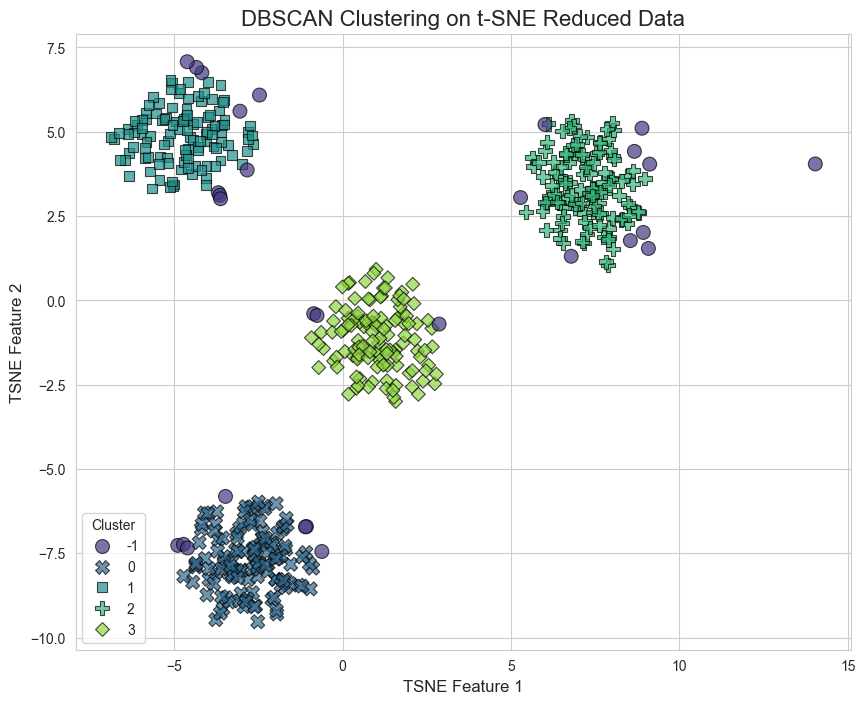

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Create a high-dimensional sample dataset for demonstration
# In our project, we would use a subsample of our orbital data.
X, _ = make_blobs(n_samples=500, n_features=50, centers=4, cluster_std=2.0, random_state=42)

# Apply t-SNE to reduce the data to 2 dimensions
print("Applying t-SNE for dimensionality reduction...")
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)
print("t-SNE complete.")

# Now, we apply DBSCAN to the 2-D t-SNE-reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)

# Prepare data for plotting
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_Feature_1', 'TSNE_Feature_2'])
df_tsne['cluster_label'] = clusters

# Set up the plot style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Create a scatterplot of the DBSCAN clusters
palette = sns.color_palette("viridis", n_colors=len(np.unique(clusters)))
sns.scatterplot(
    data=df_tsne,
    x='TSNE_Feature_1',
    y='TSNE_Feature_2',
    hue='cluster_label',
    palette=palette,
    style='cluster_label',
    s=100,
    alpha=0.7,
    edgecolor='k'
)

# Add labels and a title to the plot
plt.title('DBSCAN Clustering on t-SNE Reduced Data', fontsize=16)
plt.xlabel('TSNE Feature 1', fontsize=12)
plt.ylabel('TSNE Feature 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()